In [23]:
import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('df',index_col=False)

In [4]:
dummies = pd.get_dummies(df['Type'])
df = pd.concat([df.drop('Type', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['Furnished'])
df = pd.concat([df.drop('Furnished', axis=1), dummies], axis=1)

df['Utilities_included'] = df['Utilities_included'].astype(int)

In [5]:
X = df.drop(['Title', 'Location', 'Price', 'Availability_date', 'URL'], axis=1).values
y = df['Price'].values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [10]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size = 128, epochs=400)

Epoch 1/400
4/4 [==============================] - 2s 70ms/step - loss: 1294016.6250 - val_loss: 1346443.2500
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 1293949.6250 - val_loss: 1346371.2500
Epoch 3/400
4/4 [==============================] - 0s 14ms/step - loss: 1293880.2500 - val_loss: 1346293.0000
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1293802.2500 - val_loss: 1346205.7500
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 1293715.3750 - val_loss: 1346111.5000
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1293624.0000 - val_loss: 1346011.0000
Epoch 7/400
4/4 [==============================] - 0s 13ms/step - loss: 1293524.8750 - val_loss: 1345903.1250
Epoch 8/400
4/4 [==============================] - 0s 12ms/step - loss: 1293417.8750 - val_loss: 1345786.6250
Epoch 9/400
4/4 [==============================] - 0s 14ms/step - loss: 1293302.2500 - val_loss: 1345661.7500
Epoch 10/4

In [14]:
losses = pd.DataFrame(model.history.history)

<Axes: >

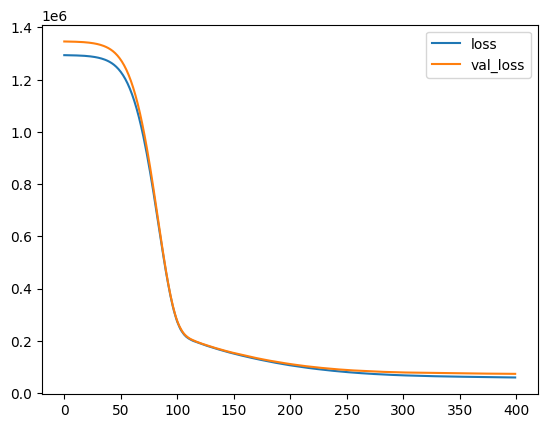

In [15]:
losses.plot()

In [17]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [20]:
np.sqrt(mean_squared_error(y_test, predictions))

270.24719161417875

In [21]:
mean_absolute_error(y_test, predictions)

207.24662385163484

In [22]:
explained_variance_score(y_test, predictions)

0.5663184497237965

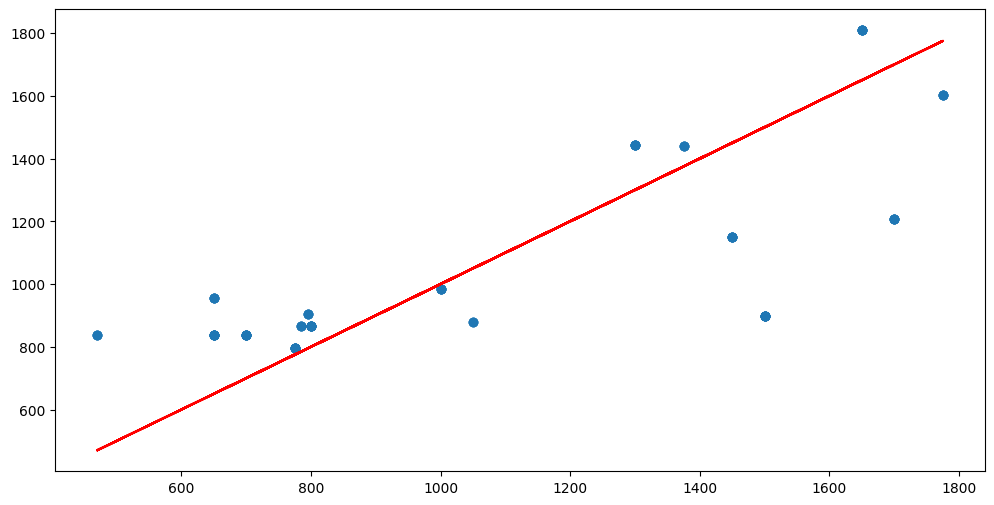

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')